# AMOC Z Plotting Routines
**Goal:** Produce timeseries plots for AMOC(z)  
**Date:** April 2023  
**Creator:** Frederic Castruccio  

In [1]:
%load_ext autoreload
%autoreload 2
import xarray as xr 
import numpy as np  
import cftime
import datetime
import copy
#import scipy.stats
#from scipy import signal
from functools import partial
import glob
import dask
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
from matplotlib.dates import ConciseDateConverter
munits.registry[cftime.DatetimeNoLeap] = ConciseDateConverter()
munits.registry[cftime.datetime] = ConciseDateConverter()
#from geocat.viz import util as gvutil
#import util
import cartopy
import xesmf as xe
#import xskillscore as xs
#cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
%matplotlib inline

#from HRDPutils import calendar_utils as cal
#from HRDPutils import stat_utils as stat
#from HRDPutils import mapplot_utils as maps
#from HRDPutils import colorbar_utils as cbars
#from HRDPutils import io_utils as io
#from HRDPutils import regrid_utils as regrid

In [2]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP85/HR/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF/ocn/proc/tseries/month_1/B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway.CN_OFF.pop.h.MOCz.200601.210012.nc'
ds = xr.open_dataset(mocf)
ds['time'] = ds.time - datetime.timedelta(0.5) #middle of the month

In [3]:
month_length = ds.time.dt.days_in_month
wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()

In [4]:
amoc_rcp85_1 = ds.MOC.where(ds.MOC.moc_z > 50000).isel(transport_reg=1).max('moc_z').sel(lat_aux_grid=26.5, method="nearest")
yamoc_rcp85_1 = (amoc_rcp85_1 * wgts).resample(time="AS").sum(dim="time") / (xr.ones_like(amoc_rcp85_1) * wgts).resample(time="AS").sum(dim="time")

In [5]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP85/HR/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.30.002/ocn/proc/tseries/month_1/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.30.002.pop.h.MOCz.200601-210012.nc'
ds2 = xr.open_dataset(mocf)
ds2['time'] = amoc_rcp85_1.time

amoc_rcp85_2 = ds2.MOC.where(ds2.MOC.moc_z > 50000).isel(transport_reg=1).max('moc_z').sel(lat_aux_grid=26.5, method="nearest")
yamoc_rcp85_2 = (amoc_rcp85_2 * wgts).resample(time="AS").sum(dim="time") / (xr.ones_like(amoc_rcp85_2) * wgts).resample(time="AS").sum(dim="time")

In [6]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP85/HR/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.31.003/ocn/proc/tseries/month_1/b.e13.BRCP85C5.ne120_t12.cesm-ihesp-hires1.0.31.003.pop.h.MOCz.200601-210012.nc'
ds3 = xr.open_dataset(mocf)
ds3['time'] = amoc_rcp85_1.time

amoc_rcp85_3 = ds3.MOC.where(ds3.MOC.moc_z > 50000).isel(transport_reg=1).max('moc_z').sel(lat_aux_grid=26.5, method="nearest")
yamoc_rcp85_3 = (amoc_rcp85_3 * wgts).resample(time="AS").sum(dim="time") / (xr.ones_like(amoc_rcp85_3) * wgts).resample(time="AS").sum(dim="time")

In [7]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP45/HR/b.e13.BRCP45C5.ne120_t12.cesm-ihesp-hires1.0.42.003/ocn/proc/tseries/month_1/b.e13.BRCP45C5.ne120_t12.cesm-ihesp-hires1.0.42.003.pop.h.MOCz.*.nc'

ds4 = xr.open_mfdataset(mocf,
                      #parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       #preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       chunks={"time": 1}, # choose simple
                      )

ds4['time'] = amoc_rcp85_1.time

amoc_rcp45_1 = ds4.MOC.where(ds4.MOC.moc_z > 50000).isel(transport_reg=1).max('moc_z').sel(lat_aux_grid=26.5, method="nearest")
yamoc_rcp45_1 = (amoc_rcp45_1 * wgts).resample(time="AS").sum(dim="time") / (xr.ones_like(amoc_rcp45_1) * wgts).resample(time="AS").sum(dim="time")

In [8]:
mocf = '/glade/campaign/collections/cmip/CMIP6/iHESP/BRCP26/HR/b.e13.BRCP26C5.ne120_t12.cesm-ihesp-hires1.0.42.003/ocn/proc/tseries/month_1/b.e13.BRCP26C5.ne120_t12.cesm-ihesp-hires1.0.42.003.pop.h.MOCz.*.nc'

ds5 = xr.open_mfdataset(mocf,
                      #parallel=True, # use dask to read in parallel
                       combine="nested",  # combine files in order provided
                       concat_dim="time",  # concatentate files along time dimension
                       data_vars="minimal",  # only concatentate data variables with "time" dimension
                       coords="minimal",  # same as above for coordinate variables
                       compat="override",
                       #preprocess=preprocess, # run this function on each dataset first before combining
                       #chunks={"nlat": "auto", "nlon": "auto"}, # choose simple
                       chunks={"time": 1}, # choose simple
                      )

ds5['time'] = amoc_rcp85_1.time

amoc_rcp26_1 = ds5.MOC.where(ds5.MOC.moc_z > 50000).isel(transport_reg=1).max('moc_z').sel(lat_aux_grid=26.5, method="nearest")
yamoc_rcp26_1 = (amoc_rcp26_1 * wgts).resample(time="AS").sum(dim="time") / (xr.ones_like(amoc_rcp26_1) * wgts).resample(time="AS").sum(dim="time")

In [9]:
yamoc_rcp85 = (yamoc_rcp85_1 + yamoc_rcp85_2 + yamoc_rcp85_3) / 3.

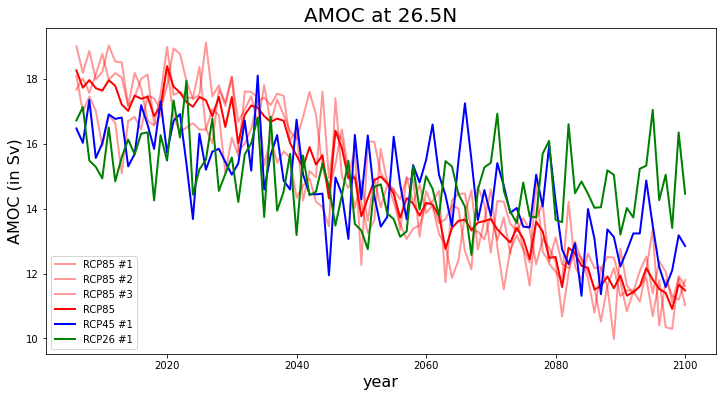

In [12]:
plt.figure(figsize=(12,6))
plt.plot(yamoc_rcp85_1.time, yamoc_rcp85_1, label='RCP85 #1', color='red', alpha=0.4, lw=2)
plt.plot(yamoc_rcp85_2.time, yamoc_rcp85_2, label='RCP85 #2', color='red', alpha=0.4, lw=2)
plt.plot(yamoc_rcp85_3.time, yamoc_rcp85_3, label='RCP85 #3', color='red', alpha=0.4, lw=2)
plt.plot(yamoc_rcp85.time, yamoc_rcp85, label='RCP85', color='red', lw=2)
plt.plot(yamoc_rcp45_1.time, yamoc_rcp45_1, label='RCP45 #1', color='blue', lw=2)
plt.plot(yamoc_rcp26_1.time, yamoc_rcp26_1, label='RCP26 #1', color='green', lw=2)
plt.legend()
plt.title('AMOC at 26.5N', fontsize=20)
plt.xlabel('year', fontsize=16)
plt.ylabel('AMOC (in Sv)', fontsize=16)
plt.savefig('AMOC_26_5_ts_RCPs.png', dpi=300, facecolor='w', edgecolor='w', orientation='portrait')